In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #tgz = tar ball (just like zip file)
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

In [3]:
data_dir

'/home/aarav/.keras/datasets/flower_photos'

In [4]:
valid_size = .2

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
import time

In [6]:
# Normalize the test and train sets with torchvision
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize(
                                       mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                          ])

In [7]:
NUM_EPOCHS = 2
lr = 0.001
batch_size = 4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
# ImageFolder class to load the train and test images
train_data = datasets.ImageFolder(data_dir, transform=train_transforms)
valid_data = datasets.ImageFolder(data_dir, transform=valid_transforms)

In [9]:
train_data

Dataset ImageFolder
    Number of datapoints: 3670
    Root location: /home/aarav/.keras/datasets/flower_photos
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [10]:
valid_data

Dataset ImageFolder
    Number of datapoints: 3670
    Root location: /home/aarav/.keras/datasets/flower_photos
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [11]:
train_data.classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [12]:
# Number of train images
num_train = len(train_data)
indices = list(range(num_train))

In [13]:
num_train

3670

In [14]:
# Split = 20% of train images
split = int(np.floor(valid_size * num_train))
# Shuffle indices of train images
np.random.shuffle(indices)

In [15]:
print(split)

734


In [16]:
# Subset indices for test and train
train_idx, valid_idx = indices[split:], indices[:split]

In [17]:
len(train_idx)

2936

In [18]:
len(valid_idx)

734

In [19]:
# Samples elements randomly from a given list of indices
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [20]:
# Batch and load the images
train_loader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=batch_size,shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, sampler=valid_sampler, batch_size=batch_size,shuffle=True)

In [21]:
examples = iter(train_loader)
samples ,labels = examples.next()
samples.shape

torch.Size([4, 3, 224, 224])

In [22]:
labels.shape

torch.Size([4])

In [23]:
labels

tensor([4, 3, 1, 4])

NameError: name 'samples' is not defined

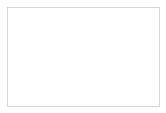

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
for i in range(4):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples[i][0])
plt.show()

In [25]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

In [26]:
sample = samples[:4]
label = labels[:4]
out = torchvision.utils.make_grid(sample)

In [27]:
class_name = train_data.classes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


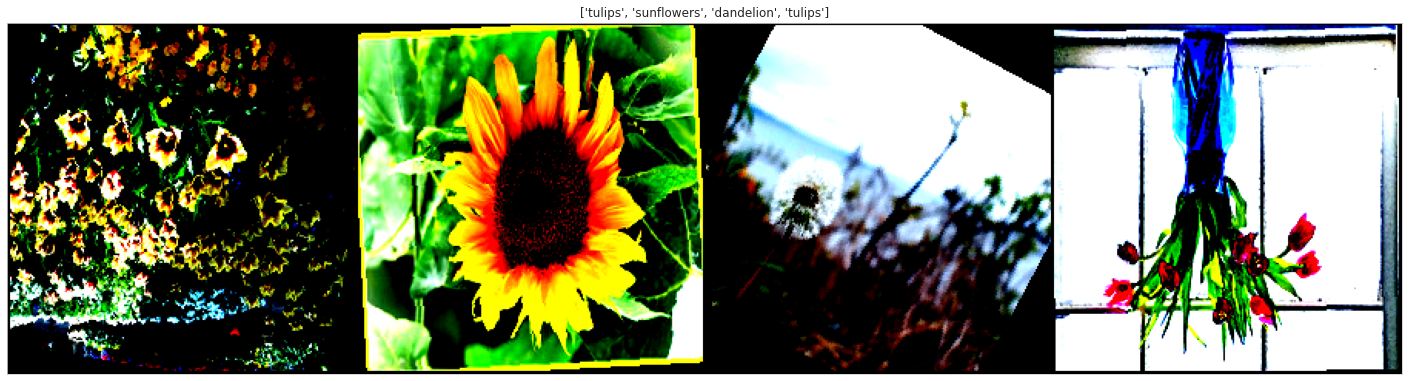

In [28]:
imshow(out,title=[class_name[x] for x in label])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


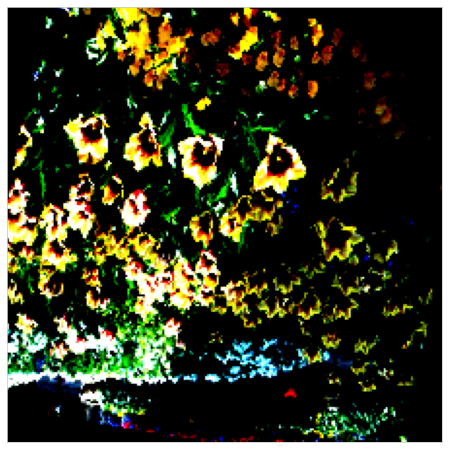

In [29]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.title(title)
    plt.show()
imshow(samples[0])

In [30]:
model = nn.Sequential(nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.MaxPool2d(2,2),
                     nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.MaxPool2d(2,2),
                     nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
                     nn.ReLU(),
                     nn.MaxPool2d(2,2),
                     nn.Flatten(),
                     nn.Linear(256*28*28,512),
                     nn.ReLU(),
                     nn.Linear(512,256),
                     nn.ReLU(),
                     nn.Linear(256,5))

In [31]:
model = model.to(DEVICE)

In [32]:
model

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU()
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=200704, out_features=512, bias=True)
  (17): ReLU()
  (18): Linear(in_features=512, out_features=256, bias=True)
  (19): ReLU()
  (20): Linea

In [33]:
#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [34]:
'''
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(DEVICE)
        #labels = labels.unsqueeze(1).float()
        print(labels)
        labels = labels.to(DEVICE)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        print(outputs)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (epoch+1) % 1 == 0:    # 
            print(f'epoch:{epoch+1},loss={running_loss}')
            running_loss = 0.0

print('Finished Training')
'''

"\nfor epoch in range(5):  # loop over the dataset multiple times\n\n    running_loss = 0.0\n    for i, data in enumerate(train_loader, 0):\n        # get the inputs; data is a list of [inputs, labels]\n        inputs, labels = data\n        inputs = inputs.to(DEVICE)\n        #labels = labels.unsqueeze(1).float()\n        print(labels)\n        labels = labels.to(DEVICE)\n\n        # zero the parameter gradients\n        optimizer.zero_grad()\n\n        # forward + backward + optimize\n        outputs = model(inputs)\n        print(outputs)\n        loss = F.cross_entropy(outputs, labels)\n        loss.backward()\n        optimizer.step()\n\n        # print statistics\n        running_loss += loss.item()\n        if (epoch+1) % 1 == 0:    # \n            print(f'epoch:{epoch+1},loss={running_loss}')\n            running_loss = 0.0\n\nprint('Finished Training')\n"

In [35]:
def compute_accuracy(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)

        probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100


start_time = time.time()
for epoch in range(2):
    
    model.train()
    
    for batch_idx, (features, targets) in enumerate(train_loader):
    
        ### PREPARE MINIBATCH
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        probas = model(features)
        cost = F.cross_entropy(probas, targets)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 4:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')

    # no need to build the computation graph for backprop when computing accuracy
    with torch.set_grad_enabled(False):
        train_acc = compute_accuracy(model, train_loader, device=DEVICE)
        valid_acc = compute_accuracy(model, valid_loader, device=DEVICE)
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Train Acc.: {train_acc:.2f}%'
              f' | Validation Acc.: {valid_acc:.2f}%')
        
    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')
  
elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

/home/aarav/anaconda3/envs/pract/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 001/002 | Batch 000/734 | Cost: 1.6165
Epoch: 001/002 | Batch 004/734 | Cost: 1.4891
Epoch: 001/002 | Batch 008/734 | Cost: 1.5036
Epoch: 001/002 | Batch 012/734 | Cost: 1.5659
Epoch: 001/002 | Batch 016/734 | Cost: 1.6252
Epoch: 001/002 | Batch 020/734 | Cost: 1.6370
Epoch: 001/002 | Batch 024/734 | Cost: 1.6316
Epoch: 001/002 | Batch 028/734 | Cost: 1.6041
Epoch: 001/002 | Batch 032/734 | Cost: 1.5981
Epoch: 001/002 | Batch 036/734 | Cost: 1.5979
Epoch: 001/002 | Batch 040/734 | Cost: 1.6096
Epoch: 001/002 | Batch 044/734 | Cost: 1.6002
Epoch: 001/002 | Batch 048/734 | Cost: 1.6119
Epoch: 001/002 | Batch 052/734 | Cost: 1.6130
Epoch: 001/002 | Batch 056/734 | Cost: 1.6057
Epoch: 001/002 | Batch 060/734 | Cost: 1.6180
Epoch: 001/002 | Batch 064/734 | Cost: 1.6030
Epoch: 001/002 | Batch 068/734 | Cost: 1.6167
Epoch: 001/002 | Batch 072/734 | Cost: 1.6204
Epoch: 001/002 | Batch 076/734 | Cost: 1.6193
Epoch: 001/002 | Batch 080/734 | Cost: 1.5701
Epoch: 001/002 | Batch 084/734 | C

Epoch: 001/002 | Batch 716/734 | Cost: 1.6456
Epoch: 001/002 | Batch 720/734 | Cost: 1.4898
Epoch: 001/002 | Batch 724/734 | Cost: 1.6325
Epoch: 001/002 | Batch 728/734 | Cost: 1.5361
Epoch: 001/002 | Batch 732/734 | Cost: 1.5385
Epoch: 001/002 Train Acc.: 24.90% | Validation Acc.: 22.75%
Time elapsed: 1.72 min
Epoch: 002/002 | Batch 000/734 | Cost: 1.7236
Epoch: 002/002 | Batch 004/734 | Cost: 1.7122
Epoch: 002/002 | Batch 008/734 | Cost: 1.6951
Epoch: 002/002 | Batch 012/734 | Cost: 1.6310
Epoch: 002/002 | Batch 016/734 | Cost: 1.5750
Epoch: 002/002 | Batch 020/734 | Cost: 1.5614
Epoch: 002/002 | Batch 024/734 | Cost: 1.3187
Epoch: 002/002 | Batch 028/734 | Cost: 1.6426
Epoch: 002/002 | Batch 032/734 | Cost: 1.5293
Epoch: 002/002 | Batch 036/734 | Cost: 1.6156
Epoch: 002/002 | Batch 040/734 | Cost: 1.5079
Epoch: 002/002 | Batch 044/734 | Cost: 1.5418
Epoch: 002/002 | Batch 048/734 | Cost: 1.6005
Epoch: 002/002 | Batch 052/734 | Cost: 1.4851
Epoch: 002/002 | Batch 056/734 | Cost: 1.71

Epoch: 002/002 | Batch 688/734 | Cost: 1.5549
Epoch: 002/002 | Batch 692/734 | Cost: 1.5777
Epoch: 002/002 | Batch 696/734 | Cost: 1.7222
Epoch: 002/002 | Batch 700/734 | Cost: 1.6053
Epoch: 002/002 | Batch 704/734 | Cost: 1.6119
Epoch: 002/002 | Batch 708/734 | Cost: 1.7313
Epoch: 002/002 | Batch 712/734 | Cost: 1.5826
Epoch: 002/002 | Batch 716/734 | Cost: 1.5646
Epoch: 002/002 | Batch 720/734 | Cost: 1.5389
Epoch: 002/002 | Batch 724/734 | Cost: 1.5516
Epoch: 002/002 | Batch 728/734 | Cost: 1.6980
Epoch: 002/002 | Batch 732/734 | Cost: 1.4669
Epoch: 002/002 Train Acc.: 24.90% | Validation Acc.: 22.75%
Time elapsed: 3.47 min
Total Training Time: 3.47 min


In [46]:
test = samples[0].view(1,3,224,224)
test = test.to(DEVICE)
out = model(test)

In [47]:
out

tensor([[-0.1555,  0.1964, -0.1834, -0.0282,  0.0849]], device='cuda:0',
       grad_fn=<AddmmBackward>)

In [48]:
labels[0]

tensor(4)

In [49]:
torch.max(out,dim=1)[1].item()

1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: tulips , Predicted: dandelion


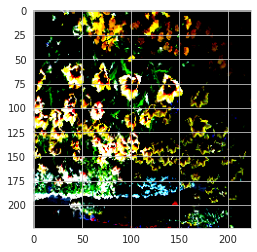

In [66]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    xb = xb.to(DEVICE)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    preds  = torch.max(yb, dim=1)
    #print(preds[1].item())
    # Retrieve the class label
    return train_data.classes[preds[1].item()]

img, label = samples[0],labels[0]
img = img
label= label.to(DEVICE)
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_data.classes[label], ', Predicted:', predict_image(img, model))